#  Project 02 - Research on Video games(2004 to 2010)

## 1. Introduction

### a) Dataset introduction:

We use the "Video Games" dataset collected and collated by Dr. Joe Cox. The data set includes more than 1,000 video games released between 2004 and 2010. The dataset, which collects a variety of factors that influence game sales, was originally designed to study what makes a blockbuster video game.

### b) Research question:

##### Linear Regression: 

1. Descriptive question: What is the relationship between Review Score and US Sales after controlling for YearRelease, Usedprice, and Maxplayers for all video games released between 2004 to 2010?
2. Inference question: How does my model perform on new data?

##### Logistic Regression:

1. Descriptive question: How do Usedprice, YearReleased, and Platform relate to the log-odds of a game being third-person in the training data? 
 2. Inference question: How does a classifier built on this model perform when predicting whether games are third-person in the test data?

### c) Response Variables:

1. Linear: US Sales (millions)
2. Logistic: Third Person

### d) Contextual Importance:

The members of our group are very interested in video games. We want to find the factors related to the sales of video games and the connections with the data variables related to video games through this research. To help game developers or game companies adjust their strategies, thereby making their games more competitive.

In [36]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [37]:
df = pd.read_csv("video_games.csv", encoding="unicode-escape")
df["Sale"]=df["US Sales (millions)"]
df["Score"] = df["Review Score"]
df.head()

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson,Sale,Score
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,1,0,0,0,1,4.69,85
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0.56,89
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,1,1,1,1,1,0.54,81
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,1,0.49,81
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,1,0,1,0,1,0.45,61


## 2. Linear Regression Analytical Tasks

### a) Research question:

1. Descriptive question: What is the relationship between Review Score and US Sales after controlling for YearRelease, Usedprice, and MaxPlayers for all video games released between 2004 to 2010?
2. Inference question: How does my model perform on new data?

### b) Split the data into traning and testing dataset:

In [38]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state= 42)

### c) Fit a linear regression model:

In [39]:
model_linear = smf.ols(formula="Sale~Score+YearReleased+Usedprice+MaxPlayers",data=df_train).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sale   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     59.60
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           1.50e-46
Time:                        18:20:49   Log-Likelihood:                -1972.3
No. Observations:                1416   AIC:                             3955.
Df Residuals:                    1411   BIC:                             3981.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      155.4719     43.402      3.582      0.000      70.332     240.612
Score            0.0203      0.002     10.451      0.000       0.017       0.024
YearReleased    -0.0782      0.022     -3.616      0.000      -0.121      -0.036
Usedprice        0.0273      0.004      7.067      0.000       0.020       0.035
MaxPlayers       0.0791      0.021      3.704      0.000       0.037       0.121
==============================================================================
Omnibus:                     1754.187   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225480.491
Skew:                           6.516   Prob(JB):                         0.00
Kurtosis:                      63.431   Cond. No.                     3.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

y-hat = 155.4719+0.0203(Score)-0.0782(YearReleased)+0.0273(Usedprice)+0.0791(MaxPlayers)

### d) Examine the relationship between your review score and US_Sales in the context of this model:

#### i) Interpret slope coefficient:

For 1 point increase in Review Score, the predicted US Sales will increase by 0.0203 millions on average, hold other variables constant.

#### ii) Provide and interpret a 95% confidence interval:

I have 95% confidence that the true slope for how much the predicted US sales of the video games increase for one point increase in Review score, on average, holding other variables constant, fall in the range(0.017, 0.024)

#### iii)  Check linear regression condition:

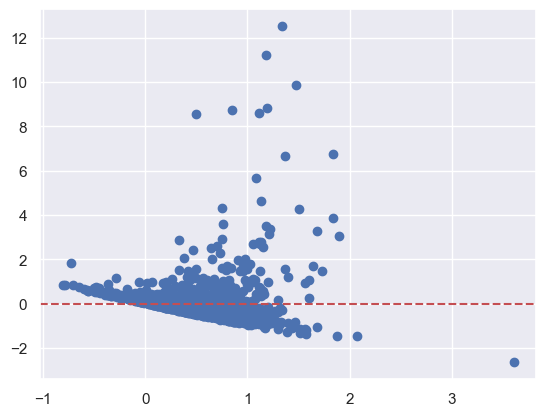

In [40]:
X_train = df_train[['Score', 'YearReleased','Usedprice','MaxPlayers']]
Y_hat = model_linear.predict(X_train)
Y_train = df_train['Sale']
e_linear = Y_train - Y_hat
plt.scatter(Y_hat, e_linear)
plt.axhline(y=0, color='r', linestyle='--')

##### Linearity:

Based on this graph, I would say that the linear model seems not appropriate. This is because we can see an especially identifiable pattern in the center of the points on the graph from left to right, and the distribution of residuals are not evenly distributed from positive and negative side.

##### Equal variance:

Based on this graph, I would say that the equal variance assumption not met. Because the encompassing line for positive and negative are not parallel

##### Independence:

Our data size(n) approximately < 10% population, and our sample is randomly selected

##### Normality:

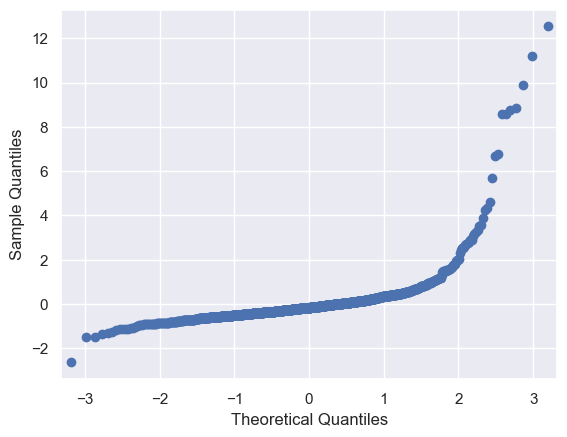

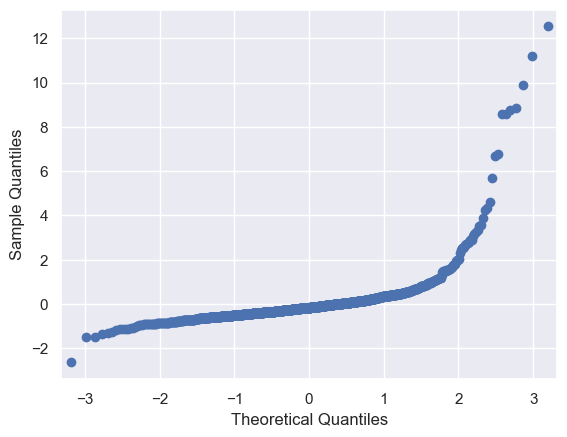

In [41]:
import statsmodels.api as sm
sm.qqplot(model_linear .resid)

Based on the qq-plot, The residual points in the qq-plot do not follow a 45° straight line, but are significantly lifted away in the upper right corner and form an overall S shape.

##### Multicollinearity:

In [42]:
df_train[['Score', 'YearReleased','Usedprice','MaxPlayers']].corr()

,Score,YearReleased,Usedprice,MaxPlayers
Score,1.000000,0.078483,0.268194,0.112888
YearReleased,0.078483,1.000000,0.475872,0.073465
Usedprice,0.268194,0.475872,1.000000,0.039671
MaxPlayers,0.112888,0.073465,0.039671,1.000000


We can see from the chart, all the correlation between the variables we select is very weak, so we can say there is not strong multicollinearity in our predictors.

### e) Evaluate your model performance:

#### i) Percent of variability:

The R-Square for this model is 0.145, so 14.5% percence of variability in US sales explained by linear model with our predictors. It is very low, so our model is not strong.

#### ii) RMSE:

In [43]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(Y_train, Y_hat)
print("RMSE:", rmse)


RMSE: 0.974264738849489


The typical distance an observed US sales is fall from actual US sales is 0.9743 millions. The error is relatively large compared to the sample scale, and the prediction effect of the model is not ideal.

## 3. Logistic Regression Analytical Tasks

#### a)Research Question: 
 1. Descriptive question: How do Usedprice, YearReleased, and Platform relate to the log-odds of a game being third-person in the training data? 
 2. Inference question: How does a classifier built on this model perform when predicting whether games are third-person in the test data?

#### (b)Fit a logistic Model:

#### (i)Show the coefficients or summary output for your model:

In [44]:
df_train_1, df_test_1 = train_test_split(df, test_size=0.2, random_state= 42)
results_1=smf.logit('ThirdPerson ~ Usedprice + YearReleased + Platform', df_train).fit()
results_1.summary()

Optimization terminated successfully.
         Current function value: 0.555322
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ThirdPerson   No. Observations:                 1416
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Sep 2025   Pseudo R-squ.:                 0.01383
Time:                        18:20:50   Log-Likelihood:                -786.34
converged:                       True   LL-Null:                       -797.36
Covariance Type:            nonrobust   LLR p-value:                 6.357e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -324.9095    102.487     -3.170      0.002    -525.781    -124.038
Usedprice        0.0032      0.009      0.346      0.729      -0.015       0.021
YearReleased     0.1624      0.051      3.177      0.001       0.062       0.263
Platform         0.7269      0.265      2.742      0.006       0.207       1.246
================================================================================
"""

#### ii) Explanation of variables:
1. For every 1-unit increase in Usedprice, the log-odds of a game being third-person increase by 0.0032
2. For every 1-year increase in YearReleased, the log-odds of a game being third-person increase by 0.1624.
3. If Platform = 1 (compared to Platform = 0), the log-odds of a game being third-person increase by 0.7269 

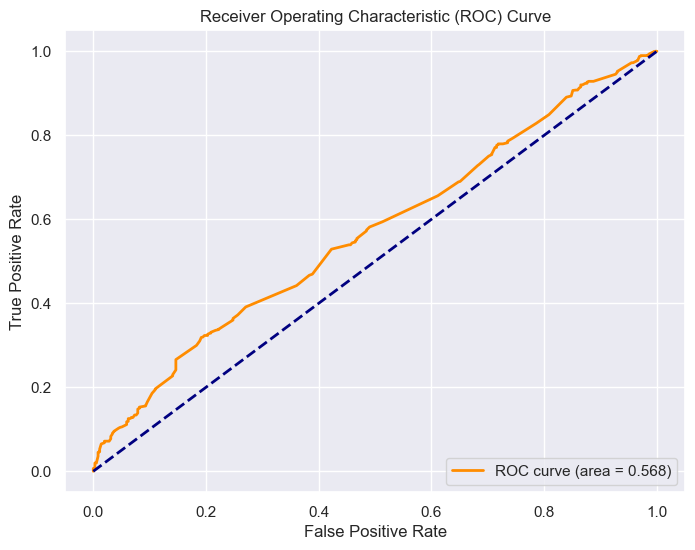

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
df_train_1['phat']=results_1.predict(df_train_1)
df_train_1['yhat']= 1 * (df_train_1['phat'] >= 0.5)

fpr, tpr, thresholds = roc_curve(y_true=df_train_1['ThirdPerson'], y_score=df_train_1['phat'])

auc = roc_auc_score(y_true=df_train_1['ThirdPerson'], y_score=df_train_1['phat'])

def plot_roc(fpr, tpr, auc, lw=2):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label="ROC curve (area = " + str(round(auc, 3)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc(fpr, tpr, auc)

In [46]:
print(auc)

0.567887058448713


#### iii) Report of AUC and Pseudo-R square:
The logistic regression model predicting whether a game is third-person has a pseudo R-squared value of 0.01174, indicating a very small amount of variation explained by the model. The model’s AUC (area under the ROC curve) is 0.568, suggesting that the model’s ability to distinguish between third-person and non-third-person games is only slightly better than random guessing.

#### (c)Build and evaluate a classifier:

#### i)Build a classifier to the test data with a predictive probability threshold of your choosing. You might consider 0.5 as a first option. 
#### Threshold Chosen : p=0.5

In [47]:
df_test_1['phat']=results_1.predict(df_test_1)
df_test_1['yhat']= 1 * (df_test_1['phat'] >= 0.5)
cfm = confusion_matrix(y_true=df_test_1["ThirdPerson"],y_pred=df_test_1["yhat"])
tn, fp, fn, tp = cfm.ravel()
(tn, fp, fn, tp)

(np.int64(0), np.int64(87), np.int64(0), np.int64(267))

In [48]:
accuracy_rate=(tn + tp)/(tn+tp+fn+fp)
sensiticity=(tp) / (tp+fn)
specificity= tn / (tn+fp)
print("accuracy_rate =", accuracy_rate)
print('sensiticity =', sensiticity)
print('specificity =', specificity)

accuracy_rate = 0.7542372881355932
sensiticity = 1.0
specificity = 0.0


#### The model has an accuracy of 75.4%, meaning it correctly classifies about 75.4% of the games overall. The sensitivity is 100%, showing that the model perfectly identifies all third-person games. However, the specificity is 0%, meaning it completely fails to identify non-third-person games. This happens because the model predicts almost every game as third-person, which leads to high sensitivity but very poor specificity.



#### iii) In this research question, the type of error I would want to minimize is the false negative — predicting that a game is not third-person when it actually is. In the context of our data, missing a third-person game could be problematic if the goal is to correctly identify and promote third-person games to users or for marketing purposes. It would be better to mistakenly classify a few non-third-person games as third-person (false positives) than to miss true third-person games that users might be most interested in.

### iv) Summary:
In the training data, YearReleased and Platform were significantly associated with the log-odds of a game being third-person. Specifically, games released more recently and those on Platform = 1 had higher odds of being third-person, while Usedprice showed no significant relationship. The model’s pseudo R² was 0.01174, suggesting it explains very little variation. When applied to new data using a classification of 0.5, the classifier achieved an accuracy of 75.4%, but this was driven by predicting nearly all games as third-person. As a result, the model had perfect sensitivity (1.0) but zero specificity (0.0). The AUC of 0.599 confirms the model only slightly better than random guessing. Overall, while the model identifies third-person games well, it performs poorly at distinguishing non-third-person titles, limiting its usefulness as a balanced classifier.

## 4. Conclusion

### a.Summarization

#### In this project, we used linear regression to examine the relationship between video game review scores and US sales, controlling for YearReleased, Usedprice, and MaxPlayers. We found that while Review Score had a positive association with US Sales, the overall model had a low R-squared value (0.145), indicating limited explanatory power. Additionally, we performed a logistic regression analysis to predict whether a game was classified as third-person based on variables like Usedprice, YearReleased, and Platform. The logistic regression model showed that Platform type had a statistically significant effect, but the overall model performance was weak, with an AUC of 0.568 and a pseudo R-squared of 0.0117.

### b.Limitations


#### One major limitation we faced was the low predictive power of both our linear and logistic regression models. The low R-squared values and poor model fit suggest that important predictors may be missing from our dataset. Additionally, the imbalance in third-person and non-third-person games caused our logistic model to have high sensitivity but very poor specificity. Contextual factors such as game genre, marketing budget, and brand recognition, which could greatly influence sales and gameplay style, were not included. Without these important variables, any conclusions drawn must be made cautiously. For game developers or marketers relying on these results, the limited explanatory power may restrict the model's practical usefulness.

### c. Future Work

#### Future research could incorporate additional variables such as marketing spend, genre type, game developer reputation, or player reviews over time to better predict game sales and third-person classification. Also, applying more advanced machine learning methods like decision trees or random forests might improve predictive performance. New research questions could include exploring how different genres impact sales across various platforms, or examining time trends in game popularity to better assist game developers in strategic planning.